In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, IntegerType, FloatType, DoubleType,StructType, StructField

In [2]:
spark = SparkSession.builder.getOrCreate()

24/04/26 16:00:27 WARN Utils: Your hostname, Devil.local resolves to a loopback address: 127.0.0.1; using 192.168.1.50 instead (on interface en0)
24/04/26 16:00:27 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/26 16:00:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [9]:
spark.createDataFrame(data=[(1, 'a'), (2, 'b'), (3, 'c')], \
            schema=StructType([StructField("id", StringType(), True),\
                                   StructField("name",StringType(),True)])).show()

+---+----+
| id|name|
+---+----+
|  1|   a|
|  2|   b|
|  3|   c|
+---+----+



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

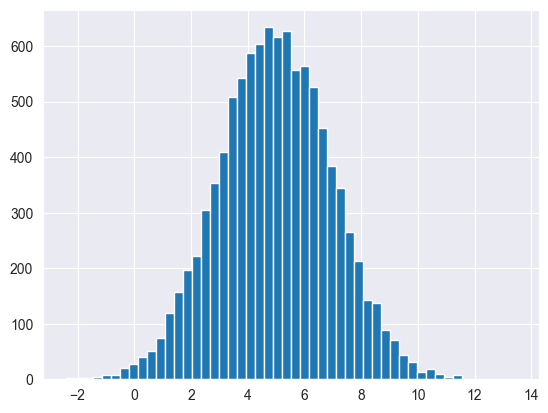

In [4]:
mu = 5.0
sigma = 2.0
values = np.random.normal(mu, sigma, 10000)
plt.hist(values,50)
plt.show()

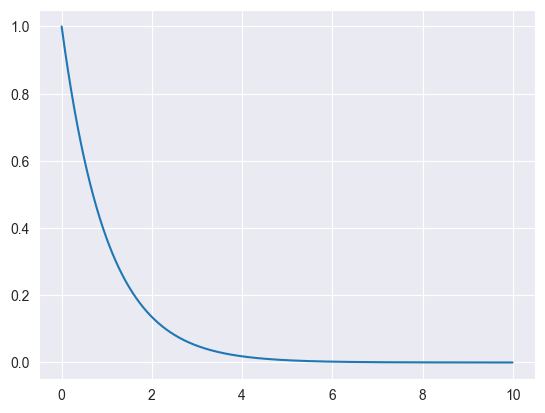

In [10]:
from scipy.stats import norm , expon
x = np.arange(0,10,0.01)
plt.plot(x,expon.pdf(x))

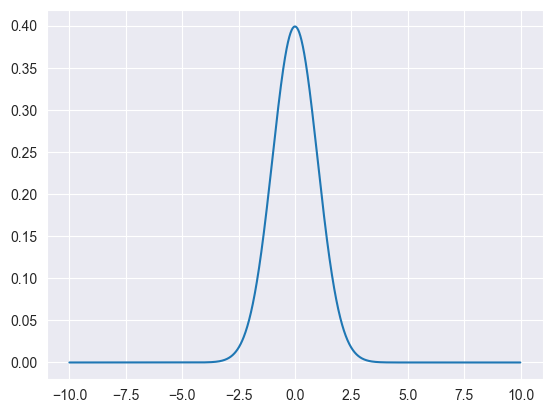

In [14]:
from scipy.stats import norm
x = np.arange(-10,10,0.01)
(plt.plot(x,norm.pdf(x)))

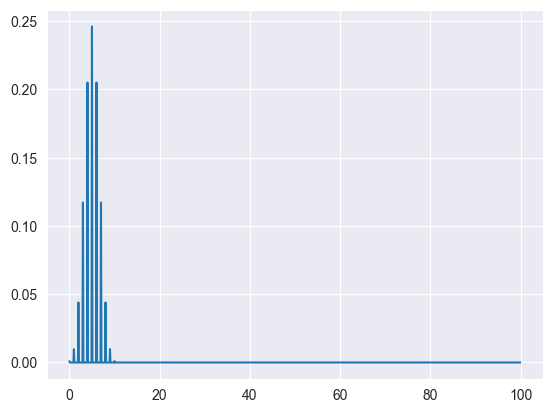

In [28]:
from scipy.stats import norm,binom,poisson,lognorm
n,p =10,0.5
x = np.arange(0,100,0.1)
plt.plot(x,binom.pmf(x,n,p))


In [4]:
spark

In [4]:
data = [(5546976 ,'7R 210','Agriview Transmission','IVT'),(5546976,'7R 210','Drive','MFWD'),(5546977 ,'7R 211','Agriview Transmission',None),(5546977,'7R 211','Drive','MFWD')]
columns = ['pin_number','model','attribute_name','attribute_value']
df = spark.createDataFrame(data=data, schema=columns)

In [5]:
df.show(truncate = False)

+----------+------+---------------------+---------------+
|pin_number|model |attribute_name       |attribute_value|
+----------+------+---------------------+---------------+
|5546976   |7R 210|Agriview Transmission|IVT            |
|5546976   |7R 210|Drive                |MFWD           |
|5546977   |7R 211|Agriview Transmission|NULL           |
|5546977   |7R 211|Drive                |MFWD           |
+----------+------+---------------------+---------------+



In [6]:
from pyspark.sql.window import Window as Wd
import pyspark.sql.functions as f
def createWindowSpec(df):
    window_spec = Wd.partitionBy('pin_number','model').orderBy('pin_number','model','attribute_name')
    return df.withColumn('drive_attribute_val',f.lead('attribute_value').over(window_spec)) \
        .withColumn('material_desc',f.when((f.col('attribute_name') == 'Agriview Transmission') & (f.col('attribute_value').isNotNull()),f.concat_ws(' ',f.col('model'),f.col('drive_attribute_val'),f.col('attribute_value'))).otherwise(f.concat_ws(' ',f.col('model'),f.col('drive_attribute_val'), f.col('attribute_value')))) \
         .drop('drive_attribute_val') 
df1 = createWindowSpec(df)
df1.show(truncate = False)

+----------+------+---------------------+---------------+---------------+
|pin_number|model |attribute_name       |attribute_value|material_desc  |
+----------+------+---------------------+---------------+---------------+
|5546976   |7R 210|Agriview Transmission|IVT            |7R 210 MFWD IVT|
|5546976   |7R 210|Drive                |MFWD           |7R 210 MFWD    |
|5546977   |7R 211|Agriview Transmission|NULL           |7R 211 MFWD    |
|5546977   |7R 211|Drive                |MFWD           |7R 211 MFWD    |
+----------+------+---------------------+---------------+---------------+



In [26]:
df1.show(truncate = False)

+----------+------+---------------------+---------------+-------------+
|pin_number|model |attribute_name       |attribute_value|material_desc|
+----------+------+---------------------+---------------+-------------+
|5546976   |7R 210|Agriview Transmission|IVT            |7R 210 IVT   |
|5546976   |7R 210|Drive                |MFWD           |7R 210 MFWD  |
+----------+------+---------------------+---------------+-------------+

